# 💸 Project #2 - Transactional Fraud Data Analysis of Credit Card Fraud Data
*by Andrew Kim - kim.andrew.j1@gmail.com*

## 🎯 Objective
Build and optimize a machine learning model for transactional fraud detection (TFD) using the real-world fraud dataset from Project #1, `creditcard.csv`.

Develop a baseline fraud detection model, then systematically improve its performance through hyperparameter tuning and class balancing techniques.

---

## 🗂️ The Dataset (https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
The Dataset is comprised of:
- Transactions made by European cardholders in September 2013
- Features are PCA-transformed (`V1`–`V28`) plus `Time`, `Amount`, and `Class`
- `Class = 1` indicates a Fraudulent transaction

---

## ✅ Project Tasks
1. **Import the Dataset**
  - Load the dataset into a Pandas DataFrame
  - Use `df.head()` to preview the first few rows

2. **Summary Statistics**
  - Use `df.describe()` to examine key metrics

3. **Build a Decision Tree Model**
  - Use 70/30 train/test split

4. **Update Train/Test Split**
  - Change Train/Test split from **70/30** to **80/20**
  - Apply new split to both models for fair comparison

5. **Build a Random Forest Model**
  - Replace **Decision Tree Model** with **Random Forest Classifier**
  - Set parameters: `n_estimators=200`, `max_depth=5`, `random_state=42`

6. **Model Evaluation**
  - Report `Precision`, `Recall`, `F1-Score`, and `ROC-AUC`

7. **Observations**
  - Compare Decision Tree Model and Random Forest Classifier results

---

## Decision Tree Model


Loaded from current directory
Dataset shape: (284807, 31)

Dataset summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 

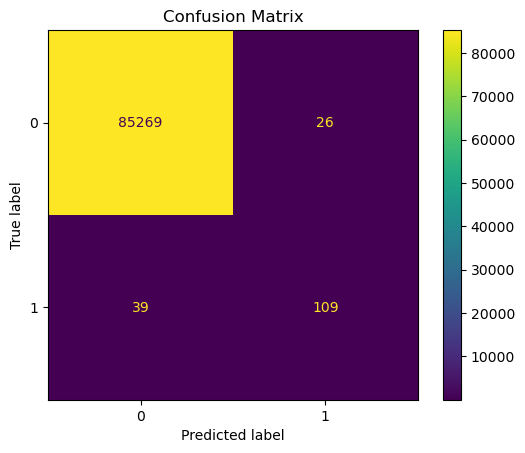

In [1]:
# =====================================
# DECISION TREE MODEL & EVALUATION
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from IPython.display import Markdown  # Import the Markdown function
display(Markdown("## Decision Tree Model\n"))

df = pd.read_csv('creditcard.csv')
print("Loaded from current directory")

print("Dataset shape:", df.shape)
print("\nDataset summary statistics:")
print(df.describe())

print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nDecision Tree Model Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# **Observations - Dataset (creditcard.csv)**
- Same Dataset Observations as Project #1
- This dataset represents credit card transactions made by European Credit Card users in Sept 2013 over 48 hours
  - **`Time`** represents seconds elapsed between first recorded transaction and each subsequent transaction after
  - **`Amount`** represents the transaction amount
  - **`Class`** is the response variable where **`1` = Fraudulent** and **`0` = Legitimate**
  - **`V1`, `V2`, `V3`, ... `V28`** are protected transaction details that have been mathematically disguised for privacy# 
- This is a summary of statistical information from the DataFrame "df"
  - **`count`**: There were **284,807** values under **`Time`**, meaning that there were **284,807** total transactions over **2 Days/48 Hours**
  - **`mean`**: The average transaction occurred around **`94,813` seconds** - approx. 1.1 Days - from the first transaction; Average Transaction was **`$88.35`** 
  - **Fraud Rate** = .001727 = .1727%

---

# **Observations - Decision Tree Model**
- **`Precision`** = **`80.74%`** = True Positive/(True Positive + False Positive)
   - Of all transactions flagged as fraud, 80.74% were actually fraud; 19.26% were falsely flagged (false positives)
- **`Recall`** = **`73.65%`** = True Positive/(True Positive + False Negative)
   - Of all Fraudulent transactions, 73.65% were correctly flagged as fraud; 26.35% were falsely not identified (false negatives)
- **`F-1 Score`** = **`77.03%`** = 2 * (Precision * Recall)/(Precision + Recall)
   - Precision and Recall could be better to eliminate false flags (19.26% and 26.35%)
- **`ROC-AUC`** = **`86.81%`**
- **Confusion Matrix Results**
  - According to Matrix, **`85,269`** transactions were correctly identified as Legitimate transactions
  - According to Matrix, **`26`** Fraudulent transactions were NOT identified as Fraudulent transactions
  - According to Matrix, **`39`** Legitimate transactions were incorrectly identified as Fraudulent transactions


## Random Forest Model


Dataset shape: (284807, 31)

Dataset summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2

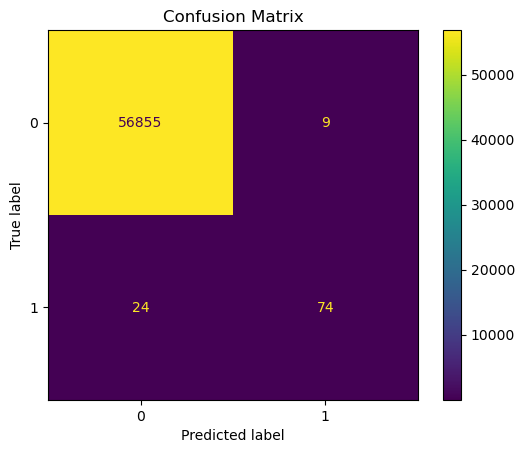

In [2]:
# =====================================
# RANDOM FOREST CLASSIFIER & EVALUATION
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# changed sklearn.tree to 'sklearn.ensemble'
# changed import to 'RandomForestClassifier'
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

display(Markdown("## Random Forest Model\n"))

df = pd.read_csv('creditcard.csv')

# Quick look at the data
print("Dataset shape:", df.shape)
print("\nDataset summary statistics:")
print(df.describe())

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

# Prepare the Data
# Drop 'Time' feature, use 'Amount' and PCA features
X = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
# changed test_size to "0.2"

# Build a Random Forest Model
model = RandomForestClassifier(n_estimators = 200, max_depth = 5, random_state = 42)
# changed model to 'RandomForestClassifier'
# added 'n_estimators = 200, max_depth = 5' 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nRandom Forest Model Evaluation Metrics:")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()
plt.title('Confusion Matrix')
plt.show()

# **Observations - Random Forest Model**
- **Fraud Rate** = .001727 = .1727%; Consistent with Dataset regardless of Model
- **`Precision`** = **`89.16%`** = True Positive/(True Positive + False Positive)
  - Of all transactions flagged as fraud, 89.16% were actually fraud; 10.84% were falsely flagged (false positives)
- **`Recall`** = **`75.51%`** = True Positive/(True Positive + False Negative)
  - Of all Fraudulent transactions, 75.51% were correctly identified as fraud; 24.49% of Fraudulent transactions were not identified (false negatives)
- **`F-1 Score`** = **`81.77%`** = 2 * (Precision * Recall)/(Precision + Recall)
- **`ROC-AUC`** = **`87.75%`**
  - **Insight:** **`Precision`** and **`Recall`** could be better to eliminate false flags (10.84% and 24.49%)
- **Confusion Matrix Results**
  - According to Matrix, **`56,855`** transactions were correctly identified as Legitimate transactions
  - According to Matrix, **`9`** Fraudulent transactions were NOT correctly identified as Fraudulent transactions
  - According to Matrix, **`24`** Legitimate transactions were incorrectly identified as Fraudulent transactions

In [3]:
# =====================================
# MODEL COMPARISON
# =====================================

display(Markdown("## Decision Tree v. Random Forest Model\n"))

print("\nDECISION TREE RESULTS:")
print(f"  Precision: 80.74%")
print(f"  Recall:    73.65%") 
print(f"  F1-Score:  77.03%")
print(f"  ROC-AUC:   86.81%")

print("\nRANDOM FOREST RESULTS:")
print(f"  Precision: {precision_score(y_test, y_pred)*100:.2f}%")
print(f"  Recall:    {recall_score(y_test, y_pred)*100:.2f}%")
print(f"  F1-Score:  {f1_score(y_test, y_pred)*100:.2f}%")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred)*100:.2f}%")

## Decision Tree v. Random Forest Model



DECISION TREE RESULTS:
  Precision: 80.74%
  Recall:    73.65%
  F1-Score:  77.03%
  ROC-AUC:   86.81%

RANDOM FOREST RESULTS:
  Precision: 89.16%
  Recall:    75.51%
  F1-Score:  81.77%
  ROC-AUC:   87.75%


# **Observations - Decision Tree v. Random Forest Model**
- **Insight:** Random Forest Model had **greater** precision and recall compared to Decision Tree Model
   - Difference in Precision means **less false positives** identified
   - Difference in Recall means **more Fraudulent transactions** were correctly idenfitied
- **Insight:** Based on ROC-AUC, Random Forest Model was the **more accurate model** compared to Decision Tree Model

---
# **Additional Analysis**
---

⚖️ **Task 1:** Balance Data using **Random Undersampling** on training data        
🔧 **Task 2:** Tune Hyperparameters **`n_estimators`** (`100`, `200`, `300`) and **`max_depth`** (`3`, `5`, `7`)      
📊 **Task 3:** **Compare** model results  

In [4]:
# =====================================
# DATA BALANCING - UNDERSAMPLING
# =====================================

# Additional imports needed
from sklearn.utils import resample
from sklearn.model_selection import ParameterGrid
import time

# Create train/test split
  # Used same parameters as Random Forest Classifier Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(Markdown("## Data Balancing - Undersampling\n"))

# Random Undersampling to Balance Trainig Data
  # Separate majority and minority classes in training data
X_train_majority = X_train[y_train == 0]  # Legitimate transactions
X_train_minority = X_train[y_train == 1]  # Fraudulent transactions
y_train_majority = y_train[y_train == 0]
y_train_minority = y_train[y_train == 1]

print(f"\nOriginal training data:")
print(f"  Legitimate transactions: {len(X_train_majority):,}")
print(f"  Fraudulent transactions: {len(X_train_minority):,}")
print(f"  Imbalance ratio: {len(X_train_majority)/len(X_train_minority):.1f}:1")

# Undersample majority class to match minority class size 
  # Reduced 227,852 Legitimate transactions to match 394 Fraudulent transactions
X_train_majority_downsampled = resample(X_train_majority,
                                       replace=False,    
                                       n_samples=len(X_train_minority),  # Matching fraud count
                                       random_state=42)
y_train_majority_downsampled = resample(y_train_majority,
                                       replace=False,
                                       n_samples=len(X_train_minority),
                                       random_state=42)

# Combine minority class with downsampled majority class
X_train_balanced = pd.concat([X_train_majority_downsampled, X_train_minority])
y_train_balanced = pd.concat([y_train_majority_downsampled, y_train_minority])

print(f"\nBalanced Training Data:")
print(f"  Legitimate transactions: {len(X_train_balanced[y_train_balanced == 0]):,}")
print(f"  Fraudulent transactions: {len(X_train_balanced[y_train_balanced == 1]):,}")
print(f"  New ratio: 1:1 (Perfectly Balanced)")
print(f"  Data reduction: {len(X_train):,} → {len(X_train_balanced):,} transactions")

# Train model on balanced data
model_balanced = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Evaluate balanced model
y_pred_balanced = model_balanced.predict(X_test)
print(f"\nBALANCED MODEL RESULTS:")
print(f"  Precision: {precision_score(y_test, y_pred_balanced)*100:.2f}%")
print(f"  Recall:    {recall_score(y_test, y_pred_balanced)*100:.2f}%")
print(f"  F1-Score:  {f1_score(y_test, y_pred_balanced)*100:.2f}%")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_balanced)*100:.2f}%")

# Compare with original model trained on imbalanced data
print(f"\nFor comparison...")
model_original = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
model_original.fit(X_train, y_train)
y_pred_original = model_original.predict(X_test)

# Verify training set numbers (Random Forest Model)
print(f"\nRandom Forest Model Data (80% of data):")
print(f"  Total transactions: {len(X_train):,}")
print(f"  Legitimate cases: {sum(y_train == 0):,}")
print(f"  Fraudulent cases: {sum(y_train == 1):,}")
print(f"  Fraud rate: {y_train.mean():.6f} ({y_train.mean()*100:.4f}%)")

print(f"\nRANDOM FOREST MODEL RESULTS (Imbalanced Training):")
print(f"  Precision: {precision_score(y_test, y_pred_original)*100:.2f}%")
print(f"  Recall:    {recall_score(y_test, y_pred_original)*100:.2f}%")
print(f"  F1-Score:  {f1_score(y_test, y_pred_original)*100:.2f}%")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_pred_original)*100:.2f}%")

## Data Balancing - Undersampling



Original training data:
  Legitimate transactions: 227,451
  Fraudulent transactions: 394
  Imbalance ratio: 577.3:1

Balanced Training Data:
  Legitimate transactions: 394
  Fraudulent transactions: 394
  New ratio: 1:1 (Perfectly Balanced)
  Data reduction: 227,845 → 788 transactions

BALANCED MODEL RESULTS:
  Precision: 6.82%
  Recall:    89.80%
  F1-Score:  12.67%
  ROC-AUC:   93.84%

For comparison...

Random Forest Model Data (80% of data):
  Total transactions: 227,845
  Legitimate cases: 227,451
  Fraudulent cases: 394
  Fraud rate: 0.001729 (0.1729%)

RANDOM FOREST MODEL RESULTS (Imbalanced Training):
  Precision: 89.16%
  Recall:    75.51%
  F1-Score:  81.77%
  ROC-AUC:   87.75%


# **Observations - Undersampling**
- **Undersampling** involves *matching* Legitimate transactions count to Fraudulent transactions count
  - Undersampling applied to 80% of Training data; matching Train/Test split of Random Forest Model
    - **Fraudulent transactions** in Undersampling Dataset = 100% of fraud cases from Training data (**`394`** Transactions)
    - **Legitimate transactions** in Undersampling Dataset = Randomly sampled to match Fraudulent transactions count (**`394`** Transactions)
- **`Precision`** = **`6.82%`** is poor compared to Random Forest Model (**`Precision`** = **`89.16%`**)
   - **Insight:** Undersampling will yield **high rate** of False Positives; upsetting Legitimate Transactions
- **`Recall`** = **`89.80%`** is very strong and shows high success rate of correctly identifying fraud
   - **Insight:** Undersampling will **miss 11.2%** of Fraudulent transactions; **better rate** than Decision Tree & Random Forest models
- **Insight:** Undersampling will fine tune Fraud detection with **less accuracy** (Precision) but **more effectiveness** (Recall)

In [5]:
# =====================================
# HYPERPARAMETER TUNING
# =====================================

# Library Imports
from sklearn.model_selection import ParameterGrid, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
import time

# Create train/test split
  # Used same parameters as Random Forest Classifier Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(Markdown("## Hyperparameter Tuning\n"))

# Hyperparameter Tuning
  # Define parameter grid
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7]}

# Create all combinations
param_combinations = list(ParameterGrid(param_grid))
print(f"\nTesting {len(param_combinations)} parameter combinations...")

# Store results
tuning_results = []

# Test each combination
for i, params in enumerate(param_combinations):
    print(f"\nTesting combination {i+1}/{len(param_combinations)}: n_estimators={params['n_estimators']}, max_depth={params['max_depth']}")
    
    # Train model with current parameters - added n_jobs for parallel processing
    model_tuned = RandomForestClassifier(**params, random_state=42, n_jobs=-1)
    
    # Time the training
    start_time = time.time()
    model_tuned.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Make predictions
    y_pred_tuned = model_tuned.predict(X_test)
    
    # Calculate metrics
    precision = precision_score(y_test, y_pred_tuned)
    recall = recall_score(y_test, y_pred_tuned)
    f1 = f1_score(y_test, y_pred_tuned)
    roc_auc = roc_auc_score(y_test, y_pred_tuned)
    
    # Store results
    results = {'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'training_time': training_time}
    tuning_results.append(results)
    
    print(f" Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1: {f1*100:.2f}%, ROC-AUC: {roc_auc*100:.2f}%")

## Hyperparameter Tuning



Testing 9 parameter combinations...

Testing combination 1/9: n_estimators=100, max_depth=3
 Precision: 81.69%, Recall: 59.18%, F1: 68.64%, ROC-AUC: 79.58%

Testing combination 2/9: n_estimators=200, max_depth=3
 Precision: 81.94%, Recall: 60.20%, F1: 69.41%, ROC-AUC: 80.09%

Testing combination 3/9: n_estimators=300, max_depth=3
 Precision: 82.67%, Recall: 63.27%, F1: 71.68%, ROC-AUC: 81.62%

Testing combination 4/9: n_estimators=100, max_depth=5
 Precision: 91.25%, Recall: 74.49%, F1: 82.02%, ROC-AUC: 87.24%

Testing combination 5/9: n_estimators=200, max_depth=5
 Precision: 89.16%, Recall: 75.51%, F1: 81.77%, ROC-AUC: 87.75%

Testing combination 6/9: n_estimators=300, max_depth=5
 Precision: 89.16%, Recall: 75.51%, F1: 81.77%, ROC-AUC: 87.75%

Testing combination 7/9: n_estimators=100, max_depth=7
 Precision: 95.00%, Recall: 77.55%, F1: 85.39%, ROC-AUC: 88.77%

Testing combination 8/9: n_estimators=200, max_depth=7
 Precision: 95.12%, Recall: 79.59%, F1: 86.67%, ROC-AUC: 89.79%

Te

# **Observations - Hyperparameter Tuning**
- NOTE: Originally attempted 25 Parameter Combinations **`n_estimators`**: [`100`, `150`, `200`, `250`, `300`], **`max_depth`**: [`3`, `4`, `5`, `6`, `7`]
   - Increased parameters overloaded terminal; time to complete was > 30 minutes
   - **Insight:** **Insignificant to minimal** differences applying in-between middle parameters (**`n_estimators:`** `150`, `250`; **`max_depth:`** `4`, `6`)
- Combination of **`n_estimator:`** `200`; **`max_depth:`** `5` produced same results as **`n_estimator:`** `300`; **`max_depth:`** `5`
- Combination of **`n_estimator:`** `300`; **`max_depth:`** `7` produced diminishing return compared to **`n_estimator:`** `200`; **`max_depth:`** `7`
   - **Strongest Parameter Combination** - based on ROC-AUC - is **`n_estimator:`** `200`, **`max_depth:`** `7`

In [6]:
# =====================================
# MODEL COMPARISON
# =====================================

display(Markdown("##  Model Comparison & Analysis\n"))

# Detailed Analysis of Results
  # Convert results to DataFrame for easier analysis
results_df = pd.DataFrame(tuning_results)

print("Complete Hyperparameter Tuning Results:")
print("="*80)
print(f"{'n_est':<6} {'depth':<6} {'Precision':<10} {'Recall':<8} {'F1-Score':<9} {'ROC-AUC':<8} {'Time(s)':<8}")
print("-" * 80)

for result in tuning_results:
    print(f"{result['n_estimators']:<6} {result['max_depth']:<6} "
          f"{result['precision']*100:<10.2f} {result['recall']*100:<8.2f} "
          f"{result['f1_score']*100:<9.2f} {result['roc_auc']*100:<8.2f} "
          f"{result['training_time']:<8.2f}")

# Find best models for different metrics
best_precision_idx = results_df['precision'].idxmax()
best_recall_idx = results_df['recall'].idxmax()
best_f1_idx = results_df['f1_score'].idxmax()
best_roc_auc_idx = results_df['roc_auc'].idxmax()

print(f"\nBest Performing Paramter Combinations:")
print(f"Best Precision: n_estimators={results_df.loc[best_precision_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[best_precision_idx, 'max_depth']} "
      f"({results_df.loc[best_precision_idx, 'precision']*100:.2f}%)")

print(f"Best Recall: n_estimators={results_df.loc[best_recall_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[best_recall_idx, 'max_depth']} "
      f"({results_df.loc[best_recall_idx, 'recall']*100:.2f}%)")

print(f"Best F1-Score: n_estimators={results_df.loc[best_f1_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[best_f1_idx, 'max_depth']} "
      f"({results_df.loc[best_f1_idx, 'f1_score']*100:.2f}%)")

print(f"Best ROC-AUC: n_estimators={results_df.loc[best_roc_auc_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[best_roc_auc_idx, 'max_depth']} "
      f"({results_df.loc[best_roc_auc_idx, 'roc_auc']*100:.2f}%)")

# Analysis insights
print(f"\nKEY INSIGHTS FROM HYPERPARAMETER TUNING:")

# n_estimators analysis
n_est_precision = results_df.groupby('n_estimators')['precision'].mean()
n_est_recall = results_df.groupby('n_estimators')['recall'].mean()

print(f"\nEffect of n_estimators (number of trees):")
for n_est in [100, 200, 300]:
    print(f"  {n_est} trees: Avg Precision = {n_est_precision[n_est]*100:.2f}%, Avg Recall = {n_est_recall[n_est]*100:.2f}%")

# max_depth analysis  
depth_precision = results_df.groupby('max_depth')['precision'].mean()
depth_recall = results_df.groupby('max_depth')['recall'].mean()

print(f"\nEffect of max_depth (tree complexity):")
for depth in [3, 5, 7]:
    print(f"  Depth {depth}: Avg Precision = {depth_precision[depth]*100:.2f}%, Avg Recall = {depth_recall[depth]*100:.2f}%")

# Training time analysis
fastest_idx = results_df['training_time'].idxmin()
slowest_idx = results_df['training_time'].idxmax()

print(f"\nTraining Time Analysis:")
print(f" Fastest: n_estimators={results_df.loc[fastest_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[fastest_idx, 'max_depth']} "
      f"({results_df.loc[fastest_idx, 'training_time']:.2f}s)")
print(f" Slowest: n_estimators={results_df.loc[slowest_idx, 'n_estimators']}, "
      f"max_depth={results_df.loc[slowest_idx, 'max_depth']} "
      f"({results_df.loc[slowest_idx, 'training_time']:.2f}s)")

##  Model Comparison & Analysis


Complete Hyperparameter Tuning Results:
n_est  depth  Precision  Recall   F1-Score  ROC-AUC  Time(s) 
--------------------------------------------------------------------------------
100    3      81.69      59.18    68.64     79.58    4.40    
200    3      81.94      60.20    69.41     80.09    8.55    
300    3      82.67      63.27    71.68     81.62    12.53   
100    5      91.25      74.49    82.02     87.24    6.88    
200    5      89.16      75.51    81.77     87.75    13.74   
300    5      89.16      75.51    81.77     87.75    20.45   
100    7      95.00      77.55    85.39     88.77    9.78    
200    7      95.12      79.59    86.67     89.79    19.15   
300    7      95.06      78.57    86.03     89.28    28.39   

Best Performing Paramter Combinations:
Best Precision: n_estimators=200, max_depth=7 (95.12%)
Best Recall: n_estimators=200, max_depth=7 (79.59%)
Best F1-Score: n_estimators=200, max_depth=7 (86.67%)
Best ROC-AUC: n_estimators=200, max_depth=7 (89.79%)

KEY 

---

# **Final Observations - Model Comparison**
- For **fewer false positives**, use parameters with **`Best Precision`**
  - **Insight:** Optimal parameter combination is **`n_estimator:`** **200**; **`max_depth:`** **7**
  - **Insight:** Average Precision decreased with **`n_estimators`** from 100 to 200, then increased from 200 to 300
  - **Insight:** Average Precision increased with greater **`max_depth`**; rate of increase consistent
- For **correctly identifying** Fraudulent transactions, use parameters with best **`Recall`**
  - **Insight:** Optimal parameter combination is **`n_estimator:`** **200**; **`max_depth:`** **7**
  - **Insight:** Average Recall increased with greater **`n_estimators`**; rate of increase consistent
  - **Insight:** Average Recall increased with greater **`max_depth`**; although rate of increase tapers off from `5` to `7`
- For **best balance** between Precision and Recall, use parameters with highest **`F1-Score`**
  - **Insight:** Optimal parameter combination is **`n_estimators:`** **200**; **`max_depth:`** **7**
- For **fastest** training, use parameters with fewer trees and shallower depth
  - **Insight:** Optimal parameter combination is **`n_estimators:`** **100**; **`max_depth:`** **3**